In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Hanna\escape_behavior_HannaJachna_2024-07-8\Tested_V2\coords_csv\CoordM4_P2_6_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V2\Timestamp\M4_P2_6_18_24_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V2\Audio\M4_P2_6_18_24_audio.wav'

north_pixel = 17
south_pixel = 455
east_pixel = 567
west_pixel = 98
shelter_x_pixel = 316
shelter_y_pixel = 44

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 305.6204759999983  #stimulus start time
stimulus_end = 313.2504759999983 #stimulus end time
escape_done = 308 #time mouse reaches shelter location 


In [3]:
#manually decide?
escape_response = True
freezing_response = False
#small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,NaN,NaN,0.000039,NaN,NaN,0.003603,-30.627938,0.003322,...,0.000063,NaN,NaN,0.000063,2.434143,29.748282,0.000057,-30.264276,0.707559,0.000287
1,1,1,NaN,NaN,0.000063,NaN,NaN,0.006099,-30.618448,0.060703,...,0.000035,NaN,NaN,0.000045,2.434143,29.772759,0.000031,-29.956075,0.913244,0.000127
2,2,2,NaN,NaN,0.000035,NaN,NaN,0.009843,-30.488740,0.158268,...,0.000055,NaN,NaN,0.000036,2.434143,29.832350,0.000039,-29.956075,0.913460,0.000154
3,3,3,NaN,NaN,0.000027,NaN,NaN,0.007824,-30.380012,0.158268,...,0.000049,NaN,NaN,0.000041,2.252098,29.832350,0.000299,-29.956075,1.366288,0.000310
4,4,4,NaN,NaN,0.000026,NaN,NaN,0.010619,-30.374779,0.060703,...,0.000052,NaN,NaN,0.000040,2.233922,29.927524,0.000491,-29.996075,1.366288,0.000931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,8835,8835,28.645564,12.965043,0.005415,27.752169,14.352170,0.930015,27.772348,14.954754,...,0.999970,24.412810,14.018914,0.999980,22.373475,14.077163,0.999965,20.265417,14.030215,0.999992
8836,8836,8836,28.645564,12.965043,0.006994,27.774245,14.066040,0.922210,27.798156,14.758052,...,0.999972,24.422947,13.858224,0.999984,22.508850,14.021915,0.999981,20.393095,14.030215,0.999997
8837,8837,8837,28.645564,12.965043,0.004170,28.082417,13.691936,0.696116,28.338472,14.470571,...,0.999967,24.883656,13.668021,0.999979,22.772752,13.737570,0.999977,20.715588,14.030215,0.999997
8838,8838,8838,28.645564,12.965043,0.005954,28.390589,13.317832,0.842752,28.338472,14.291830,...,0.999982,24.883656,13.355650,0.999975,22.772752,13.546984,0.999954,20.715588,13.905507,0.999993


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

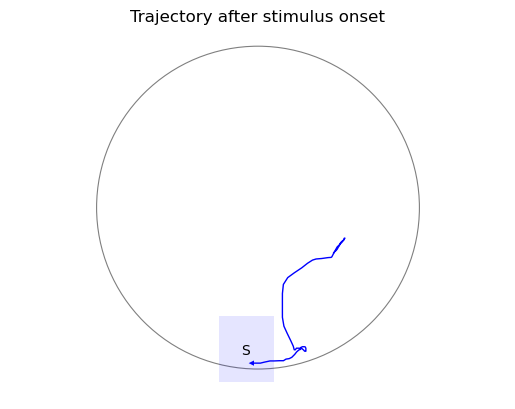

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

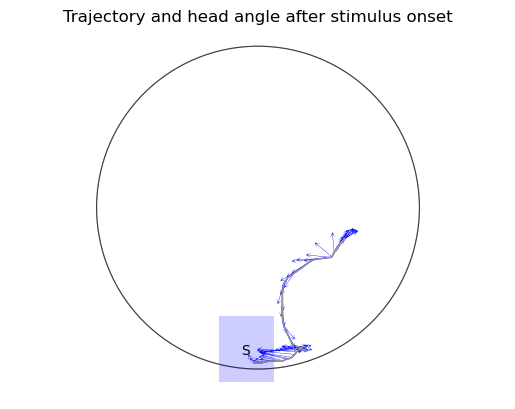

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

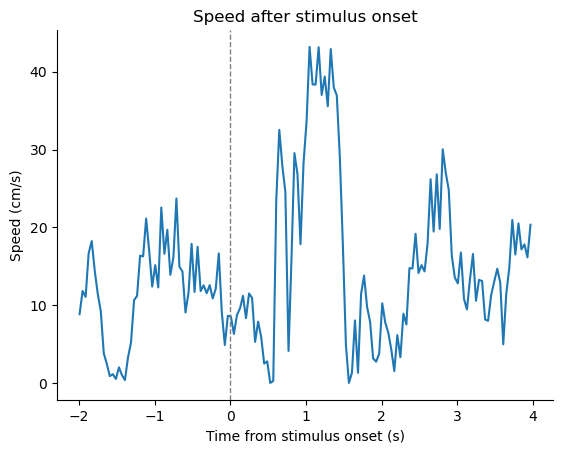

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

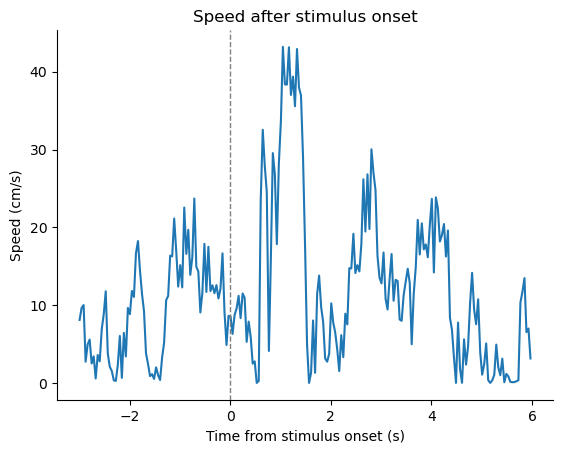

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

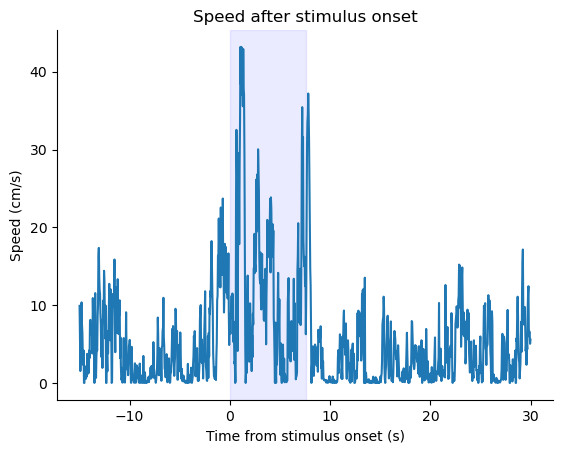

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

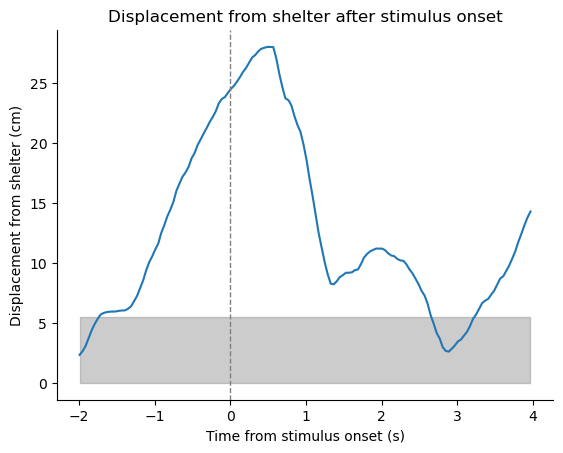

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

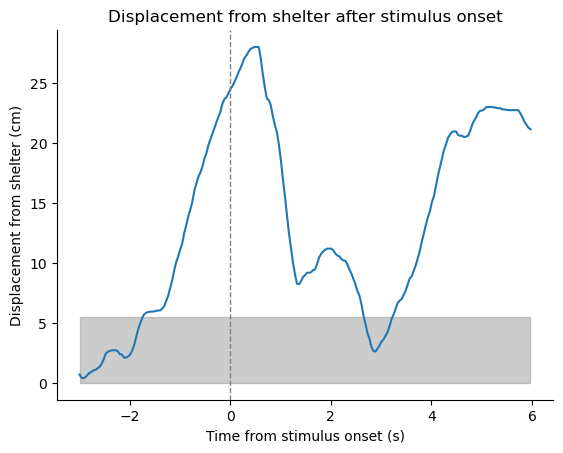

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

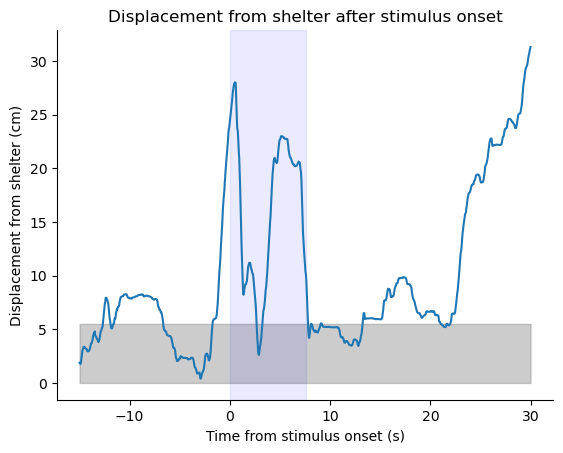

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

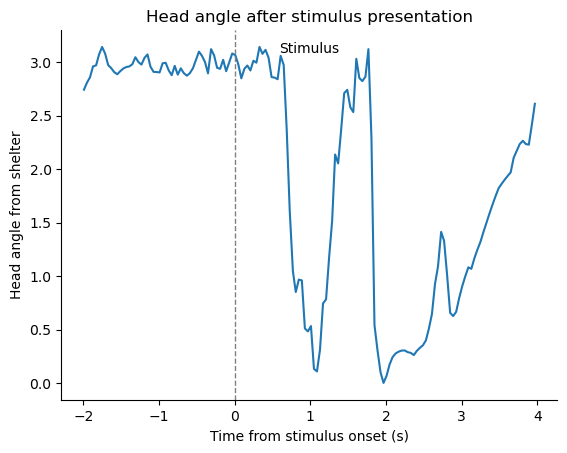

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

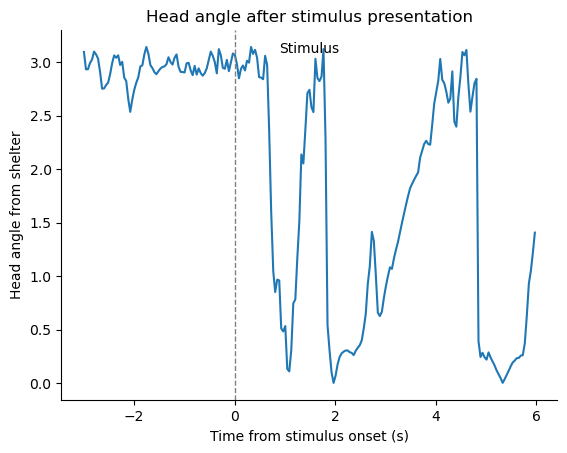

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

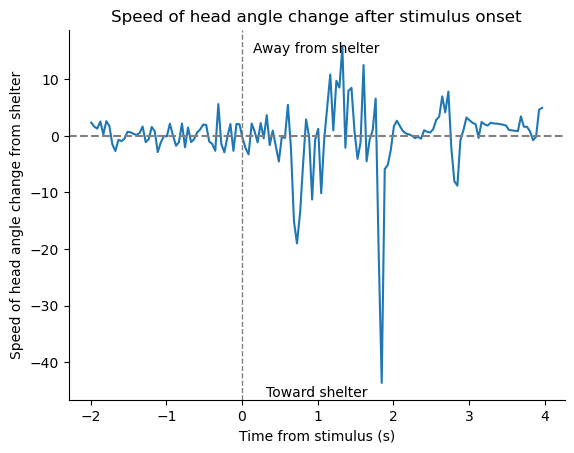

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [29]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
7627,7627,7627,17.953876,-3.969099,0.998905,16.960098,-5.274096,0.999992,16.161138,-4.668793,...,11.555581,-11.789386,1.000000,305.155124,0.007172,24.510728,8.553066,0.340814,3.065117,-0.372017
7628,7628,7628,17.974294,-3.853574,0.925308,17.182320,-5.098878,0.999961,16.391759,-4.515671,...,11.704463,-11.737075,0.999999,305.195136,0.047184,24.762566,6.299514,0.252056,2.979026,-2.151609
7629,7629,7629,17.977882,-3.376820,0.959906,17.358260,-4.723187,0.999975,16.564282,-4.196596,...,11.858708,-11.495855,0.999999,305.235175,0.087223,25.109002,8.717031,0.349021,2.847944,-3.273864
7630,7630,7630,18.180623,-3.001824,0.963589,17.462874,-4.271985,0.999988,16.744069,-3.764896,...,11.994273,-11.274020,0.999997,305.276852,0.128900,25.509576,9.614291,0.400695,2.938384,2.170019
7631,7631,7631,18.460244,-2.640536,0.528057,17.705541,-3.895529,0.999976,16.970037,-3.388997,...,12.126885,-11.134255,0.999991,305.315136,0.167184,25.923863,11.196320,0.428640,2.967590,0.762885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,7693,7693,-1.328202,-30.311243,0.891106,0.034318,-30.471031,0.995676,0.609341,-31.230987,...,6.124311,-26.202345,0.999988,307.795776,2.647824,5.650904,26.177616,1.047759,0.925226,6.966185
7694,7694,7694,-2.258937,-30.260715,0.774478,-0.869148,-30.471031,0.998987,-0.319865,-31.230987,...,5.293978,-26.308103,0.999996,307.835764,2.687812,4.945821,19.453114,0.777891,1.090885,4.142707
7695,7695,7695,-3.189671,-30.210188,0.889880,-2.116969,-30.372343,0.988710,-1.544696,-31.181471,...,4.529797,-26.775409,0.999992,307.877005,2.729053,4.145105,26.810165,1.105678,1.412761,7.804765
7696,7696,7696,-3.769239,-29.930732,0.384341,-2.718880,-30.372343,0.957882,-2.385444,-31.181471,...,3.629907,-26.885930,0.999963,307.916032,2.768080,3.698327,19.787527,0.772248,1.329198,-2.141152


In [30]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [31]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
7631,7631,7631,18.460244,-2.640536,0.528057,17.705541,-3.895529,0.999976,16.970037,-3.388997,...,12.126885,-11.134255,0.999991,305.315136,0.167184,25.923863,11.196320,0.428640,2.967590,0.762885
7632,7632,7632,18.739865,-2.279249,0.692588,18.052805,-3.548189,0.999974,17.234579,-2.977997,...,12.227708,-10.576980,0.999992,305.355136,0.207184,26.255471,8.324197,0.332968,2.921306,-1.157096
7637,7637,7637,20.174851,-2.112741,0.442319,19.268321,-3.061317,0.999987,18.681541,-2.325644,...,13.201612,-9.190814,0.999997,305.555213,0.407261,27.848754,5.937719,0.237586,3.114088,0.937797
7638,7638,7638,20.370634,-2.287980,0.404881,19.398008,-3.158315,0.999992,18.826954,-2.399305,...,13.357146,-9.103363,0.999997,305.595290,0.447338,27.936902,2.487040,0.099673,3.041028,-1.822990
7639,7639,7639,20.566416,-2.463219,0.861331,19.398008,-3.175691,0.999998,18.826954,-2.427554,...,13.448296,-9.032925,0.999996,305.635392,0.487440,28.010534,2.774170,0.111250,2.859023,-4.538540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,7792,7792,-21.922329,-23.090726,0.224142,-22.849837,-24.044536,0.999602,-22.218976,-24.295754,...,-19.655254,-17.260182,0.999994,311.756877,6.608925,20.240090,0.782957,0.031418,0.928828,-0.615691
7793,7793,7793,-21.886655,-23.072982,0.154793,-22.849837,-24.017040,0.999228,-22.218976,-24.213314,...,-19.635324,-17.259922,0.999996,311.797888,6.649936,20.250706,0.895430,0.036722,0.906128,-0.553528
7794,7794,7794,-21.850980,-23.055237,0.298109,-22.849837,-23.987322,0.999567,-22.218976,-24.213178,...,-19.625368,-17.134431,0.999997,311.836992,6.689040,20.266218,1.362441,0.053277,0.882999,-0.591460
7795,7795,7795,-21.815306,-23.037493,0.084331,-22.655456,-23.342263,0.998893,-21.869251,-23.441750,...,-19.494694,-16.671165,0.999999,311.876903,6.728951,20.352926,14.362466,0.573220,0.512158,-9.291705


In [32]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

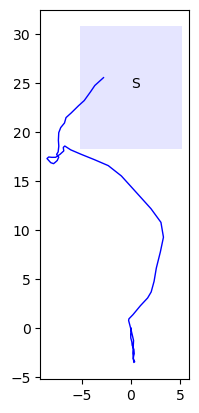

In [33]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


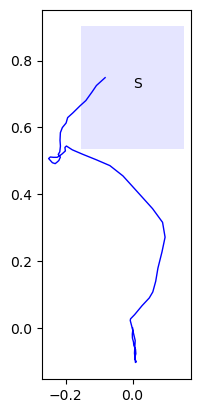

In [34]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

